# Import all necessary libraries

In [1]:
# PyQt5 is useful to print plots outside the notebook
# import PyQt5
# %config InlineBackend.figure_format = 'retina'
# %matplotlib qt5

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.metrics import classification_report, plot_confusion_matrix
from val_metrics import *

# Machine Learning Algorithms
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Import tables

In [2]:
tables = ['clients_table', 'products_table', 'transactions_table', 'credit_score_table']

for table in tables:
    vars()[table] = pd.read_table(table + '.txt',sep=',')

Overvierw of clients table

In [3]:
clients_table.head()

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.0,1.0,0.00,2018-12-14,NaN,1997-09-18
1,14990118,MOLOCK,Italy,Male,1.0,0.0,121219.28,2019-01-08,NaN,1980-08-03
2,14733224,PAWLUCH,Italy,Female,1.0,1.0,159663.59,2012-08-01,2013-08-09,1977-08-19
3,14648573,NALLS,Spain,Male,1.0,0.0,140827.98,2019-06-19,NaN,1979-02-27
4,15365443,EBERLE,Italy,Male,1.0,0.0,35521.28,2014-01-26,2015-12-04,1972-12-21


Overvierw of products table

In [4]:
products_table.head()

,ContractId,CustomerId,Products
0,5Xo9sCduOGo5EhBYhzKrSlLIA,14993808,Product B
1,3nQbqbnpTeSkYIJWT1UDe1GZ1,15560417,Product B
2,PD9KwDPOwyJWO6LJKPGBbkrCz,15406428,Product C
3,IhS7pz8lu07LCZSqYNlL0fuLP,15604313,Product B
4,ftUey4oVmkZj8RaBVFH6SNzVM,14952409,Product C


Overvierw of transactions table

In [5]:
transactions_table.head()

,CustomerId,Transaction,Value
0,15653320,trans_4,-294.03
1,14955663,trans_3,1297.97
2,15218505,trans_4,191.28
3,15391934,trans_3,2299.07
4,14847291,trans_3,1612.10


Overvierw of credit score table

In [6]:
credit_score_table.head()

,CustomerId,Date,Score
0,14759722,2018-07,717
1,15907276,2011-09,562
2,15346641,2013-01,604
3,15595126,2018-08,469
4,15227788,2013-09,655


Number of records of clients table

In [7]:
print("Number of clients (records) at the beginning (raw data) = {}".format(clients_table.shape[0]))

Number of clients (records) at the beginning (raw data) = 1545000


# Applying Filters on "Clients dataset"

Applying first filter: Clients who have contracts with Kin Security since 2015

In [8]:
clients_F1 = clients_table.loc[clients_table['application_date'] >= '2015-01-01']

print("Records in \"clients\" table after first filter = {}".format(clients_F1.shape[0]))
clients_F1.head()

Records in "clients" table after first filter = 623242


,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.0,1.0,0.00,2018-12-14,NaN,1997-09-18
1,14990118,MOLOCK,Italy,Male,1.0,0.0,121219.28,2019-01-08,NaN,1980-08-03
3,14648573,NALLS,Spain,Male,1.0,0.0,140827.98,2019-06-19,NaN,1979-02-27
5,15638124,BRASHERS,Italy,Female,0.0,0.0,170661.45,2018-02-23,NaN,1983-01-13
7,14523468,LASKOSKI,Spain,Female,1.0,0.0,158161.23,2017-12-28,2018-11-19,1972-10-30


Applying second filter: Removing operations carried out in Italy on 2019

In [9]:
clients_F2 = clients_F1.drop(clients_F1[(clients_F1.application_date >='2019-01-01') & 
                                        (clients_F1.Geography == 'Italy')].index)

print("Records in \"clients\" table after second filter = {}".format(clients_F2.shape[0]))
clients_F2.head()

Records in "clients" table after second filter = 560947


,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.0,1.0,0.00,2018-12-14,NaN,1997-09-18
3,14648573,NALLS,Spain,Male,1.0,0.0,140827.98,2019-06-19,NaN,1979-02-27
5,15638124,BRASHERS,Italy,Female,0.0,0.0,170661.45,2018-02-23,NaN,1983-01-13
7,14523468,LASKOSKI,Spain,Female,1.0,0.0,158161.23,2017-12-28,2018-11-19,1972-10-30
14,15165393,LABIANCA,Spain,Male,1.0,1.0,2612.65,2018-02-22,2019-06-11,1974-07-11


Applying third filter: Remove clients with more than 75% of its information missing

In [10]:
clients_F3 = clients_F2.dropna(thresh = int(clients_F2.shape[1]*0.75))

print("Records in \"clients\" table after third filter = {}".format(clients_F3.shape[0]))
clients_F3.head()

Records in "clients" table after third filter = 534073


,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.0,1.0,0.00,2018-12-14,NaN,1997-09-18
3,14648573,NALLS,Spain,Male,1.0,0.0,140827.98,2019-06-19,NaN,1979-02-27
5,15638124,BRASHERS,Italy,Female,0.0,0.0,170661.45,2018-02-23,NaN,1983-01-13
7,14523468,LASKOSKI,Spain,Female,1.0,0.0,158161.23,2017-12-28,2018-11-19,1972-10-30
14,15165393,LABIANCA,Spain,Male,1.0,1.0,2612.65,2018-02-22,2019-06-11,1974-07-11


Applying fourth filter: Removing clients who appear more than once in the database (more than one contract)

In [11]:
clients_F4 = clients_F3.drop_duplicates(subset=['CustomerId'])

print("Records in \"clients\" table after fourth filter = {}".format(clients_F4.shape[0]))
clients_F4.head()

Records in "clients" table after fourth filter = 518501


,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.0,1.0,0.00,2018-12-14,NaN,1997-09-18
3,14648573,NALLS,Spain,Male,1.0,0.0,140827.98,2019-06-19,NaN,1979-02-27
5,15638124,BRASHERS,Italy,Female,0.0,0.0,170661.45,2018-02-23,NaN,1983-01-13
7,14523468,LASKOSKI,Spain,Female,1.0,0.0,158161.23,2017-12-28,2018-11-19,1972-10-30
14,15165393,LABIANCA,Spain,Male,1.0,1.0,2612.65,2018-02-22,2019-06-11,1974-07-11


In [12]:
"""This line was for confirming that all clients from Italy dissapeared after the fifth filter. This means that no Italian
client have contracts of more than two years at the delivery date"""
# clients_F4.loc[(clients_F4['Geography'] == 'Italy') & (clients_table['application_date'] <= '2017-12-01')]

'This line was for confirming that all clients from Italy dissapeared after the fifth filter. This means that no Italian\nclient have contracts of more than two years at the delivery date'

Applying fifth filter: Just clients with more than two year of information within the database at delivery date are kept

In [13]:
temp = clients_F4.copy() 

clients_F5 = temp[(np.datetime64('2019-11-30') - pd.to_datetime(temp['application_date'])) > 
               np.timedelta64(2, 'Y')].reset_index(drop=True)

del temp

print("Records in \"clients\" table after fifth filter = {}".format(clients_F5.shape[0]))
clients_F5.head()

Records in "clients" table after fifth filter = 9997


,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15610711,Eluemuno,Germany,Female,0.0,0.0,167673.37,2017-03-05,2019-11-27,1976-10-21
1,15764170,Pinto,Germany,Male,1.0,0.0,36579.53,2017-02-05,2018-10-11,1972-04-02
2,15594720,Scott,Germany,Female,1.0,1.0,189339.60,2017-11-08,NaN,1982-05-14
3,15706552,Odinakachukwu,France,Male,0.0,1.0,156731.91,2016-02-15,2019-10-02,1979-09-09
4,15785358,Gresswell,Germany,Male,1.0,1.0,79366.98,2016-09-17,2016-12-20,1969-11-11


# Calculation of new asked variables

Number of products per client at the moment of application.

In [14]:
owned_products = products_table.groupby('CustomerId')['Products'].count()
final_table = pd.merge(owned_products, clients_F5, on='CustomerId')

In [15]:
final_table.head()

,CustomerId,Products,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15565701,1,Ferri,Spain,Female,0.0,0.0,90212.38,2016-01-03,2018-12-15,1976-03-30
1,15565706,1,Akobundu,Spain,Male,1.0,1.0,83256.26,2016-10-25,2017-09-16,1981-06-30
2,15565714,2,Cattaneo,France,Male,0.0,1.0,96517.97,2016-02-14,2018-06-11,1968-10-08
3,15565779,1,Kent,Germany,Female,1.0,0.0,188258.49,2015-05-17,2017-09-11,1985-04-25
4,15565796,1,Docherty,Germany,Male,1.0,0.0,74510.65,2015-04-04,2018-04-02,1966-12-07


Balance in the bank account at the moment of application.

In [16]:
account_balance = round(transactions_table.groupby('CustomerId')['Value'].sum(), 2)
final_table = pd.merge(account_balance, final_table, on='CustomerId')

In [17]:
final_table.head()

,CustomerId,Value,Products,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15565701,161993.89,1,Ferri,Spain,Female,0.0,0.0,90212.38,2016-01-03,2018-12-15,1976-03-30
1,15565706,0.00,1,Akobundu,Spain,Male,1.0,1.0,83256.26,2016-10-25,2017-09-16,1981-06-30
2,15565714,64430.06,2,Cattaneo,France,Male,0.0,1.0,96517.97,2016-02-14,2018-06-11,1968-10-08
3,15565779,57809.32,1,Kent,Germany,Female,1.0,0.0,188258.49,2015-05-17,2017-09-11,1985-04-25
4,15565796,96048.55,1,Docherty,Germany,Male,1.0,0.0,74510.65,2015-04-04,2018-04-02,1966-12-07


Score of the credit bureau at the moment of application. Consider it is a monthly score.

In [18]:
credit_score = pd.merge(clients_F5[['CustomerId', 'application_date']], credit_score_table, on='CustomerId')
credit_score = credit_score.loc[(pd.to_datetime(credit_score['Date']).dt.year == pd.to_datetime(credit_score['application_date']).dt.year)
                               & (pd.to_datetime(credit_score['Date']).dt.month == pd.to_datetime(credit_score['application_date']).dt.month)]
credit_score = credit_score.drop(columns = ['application_date', 'Date'])
final_table = pd.merge(credit_score, final_table, on='CustomerId')

In [19]:
final_table.head()

,CustomerId,Score,Value,Products,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15610711,678,128644.46,1,Eluemuno,Germany,Female,0.0,0.0,167673.37,2017-03-05,2019-11-27,1976-10-21
1,15764170,647,93960.35,1,Pinto,Germany,Male,1.0,0.0,36579.53,2017-02-05,2018-10-11,1972-04-02
2,15594720,460,102742.91,2,Scott,Germany,Female,1.0,1.0,189339.60,2017-11-08,NaN,1982-05-14
3,15706552,533,85311.70,1,Odinakachukwu,France,Male,0.0,1.0,156731.91,2016-02-15,2019-10-02,1979-09-09
4,15785358,586,106968.96,1,Gresswell,Germany,Male,1.0,1.0,79366.98,2016-09-17,2016-12-20,1969-11-11


Age of the client at the moment of application.

In [20]:
final_table['age'] = pd.to_datetime(final_table['application_date']).dt.year - pd.to_datetime(final_table['birth_date']).dt.year

In [21]:
final_table.head()

,CustomerId,Score,Value,Products,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,age
0,15610711,678,128644.46,1,Eluemuno,Germany,Female,0.0,0.0,167673.37,2017-03-05,2019-11-27,1976-10-21,41
1,15764170,647,93960.35,1,Pinto,Germany,Male,1.0,0.0,36579.53,2017-02-05,2018-10-11,1972-04-02,45
2,15594720,460,102742.91,2,Scott,Germany,Female,1.0,1.0,189339.60,2017-11-08,NaN,1982-05-14,35
3,15706552,533,85311.70,1,Odinakachukwu,France,Male,0.0,1.0,156731.91,2016-02-15,2019-10-02,1979-09-09,37
4,15785358,586,106968.96,1,Gresswell,Germany,Male,1.0,1.0,79366.98,2016-09-17,2016-12-20,1969-11-11,47


Append these new variables to the Clients data set

In [22]:
final_table = final_table[[c for c in final_table if c not in ['Score', 'Value', 'Products', 'age']] 
       + ['Score', 'Value', 'Products', 'age']]
clients_final_table = final_table.rename(columns = {'Score': 'credit_score', 'Value': 'account_balance',
                                                   'Products': 'number_of_products'}, inplace = False)
del final_table
clients_final_table.head()

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,credit_score,account_balance,number_of_products,age
0,15610711,Eluemuno,Germany,Female,0.0,0.0,167673.37,2017-03-05,2019-11-27,1976-10-21,678,128644.46,1,41
1,15764170,Pinto,Germany,Male,1.0,0.0,36579.53,2017-02-05,2018-10-11,1972-04-02,647,93960.35,1,45
2,15594720,Scott,Germany,Female,1.0,1.0,189339.60,2017-11-08,NaN,1982-05-14,460,102742.91,2,35
3,15706552,Odinakachukwu,France,Male,0.0,1.0,156731.91,2016-02-15,2019-10-02,1979-09-09,533,85311.70,1,37
4,15785358,Gresswell,Germany,Male,1.0,1.0,79366.98,2016-09-17,2016-12-20,1969-11-11,586,106968.96,1,47


Find descriptive Statistics of these new variables: Mean, standard deviation, maximum and minimum

In [23]:
def statistics(feature):
    mean = round(feature.mean(),2)
    std = round(feature.std(),2)
    maximum = round(feature.max(),2)
    minimum = round(feature.min(),2)
    return [mean, std, maximum, minimum]

d = {'Account Balance': statistics(clients_final_table['account_balance']), 'Credit Score': statistics(clients_final_table['credit_score']),
    'Number of Products': statistics(clients_final_table['number_of_products']), 'Age': statistics(clients_final_table['age'])}
df = pd.DataFrame(data=d)
df = df.rename(index={0: "Mean", 1: "Standard Deviation", 2: "Maximum", 3: "Minimum"})
df

,Account Balance,Credit Score,Number of Products,Age
Mean,76486.86,650.50,1.53,39.43
Standard Deviation,62399.55,96.64,0.58,10.50
Maximum,250898.09,850.00,4.00,93.00
Minimum,0.00,350.00,1.00,18.00


# Building the model

It was necessary to obtain a variable to differentiate between clients which left KS early and those which did not. In this regard, it was necessary to obtain the difference between 'exit_date' and 'application date', and to give those fields with NaN values a special treatment. The special treatment consistet in replacing NaN with the 'delivery date' after the first calculation, and then if that individual has NaN in the new field, then the difference between 'delivery_date' and 'application_date' was applied. This was done because of those clients who had already more than two years of suscription time to Kin Safety and have not left yet.

In [24]:
clients_final_table['ks_apptime'] = (pd.to_datetime(clients_final_table['exit_date']).dt.year - 
 pd.to_datetime(clients_final_table['application_date']).dt.year)
clients_final_table.loc[clients_final_table['ks_apptime'] >= 2, 'left_early?'] = 0
clients_final_table.loc[clients_final_table['ks_apptime'] < 2, 'left_early?'] = 1

clients_final_table['exit_date'].replace({pd.NaT:np.datetime64('2019-11-30')}, inplace=True)
clients_final_table['new_ks_apptime'] = (pd.to_datetime(clients_final_table['exit_date']).dt.year - 
 pd.to_datetime(clients_final_table['application_date']).dt.year)

clients_final_table.loc[(np.isnan(clients_final_table['ks_apptime']) == True)
                        & (clients_final_table['new_ks_apptime'] >= 2), 'left_early?'] = 0
clients_final_table.loc[(np.isnan(clients_final_table['ks_apptime']) == True)
                        & (clients_final_table['new_ks_apptime'] < 2), 'left_early?'] = 1

Variables withouth predictive power were removed and others were given a proper format

In [25]:
clients_final_table = clients_final_table.drop(columns = ['CustomerId', 'Surname', 'IsActiveMember', 
                                            'birth_date', 'application_date', 'exit_date', 'ks_apptime', 'new_ks_apptime'])
clients_final_table['left_early?'] = clients_final_table['left_early?'].astype(int)
clients_final_table['HasCrCard'] = clients_final_table['HasCrCard'].astype(int)

In [26]:
clients_final_table.head()

,Geography,Gender,HasCrCard,EstimatedSalary,credit_score,account_balance,number_of_products,age,left_early?
0,Germany,Female,0,167673.37,678,128644.46,1,41,0
1,Germany,Male,1,36579.53,647,93960.35,1,45,1
2,Germany,Female,1,189339.60,460,102742.91,2,35,0
3,France,Male,0,156731.91,533,85311.70,1,37,0
4,Germany,Male,1,79366.98,586,106968.96,1,47,1


Transformation of categorical variables to an integer encoding

In [27]:
def encoding_categorical(data):
    values = np.array(data)
    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    # binary encode
#     onehot_encoder = OneHotEncoder(sparse=False)
#     integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#     onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return integer_encoded

clients_final_table['Geography'] = encoding_categorical(clients_final_table['Geography'])
clients_final_table['Gender'] = encoding_categorical(clients_final_table['Gender'])

In [28]:
clients_final_table.head()

,Geography,Gender,HasCrCard,EstimatedSalary,credit_score,account_balance,number_of_products,age,left_early?
0,1,0,0,167673.37,678,128644.46,1,41,0
1,1,1,1,36579.53,647,93960.35,1,45,1
2,1,0,1,189339.60,460,102742.91,2,35,0
3,0,1,0,156731.91,533,85311.70,1,37,0
4,1,1,1,79366.98,586,106968.96,1,47,1


To check if a feature selection method was needed, a correlation plot was generated. It can be noticed that no significat correlation exists between variables, therefore, all of them present predictive power.

In [29]:
#The following line is useful in case of the need to convert back the dataset from an array to a DataFrame
features = ['Geography', 'Gender','HasCrCard', 'EstimatedSalary', 
            'credit_score', 'account_balance','number_of_products','age']

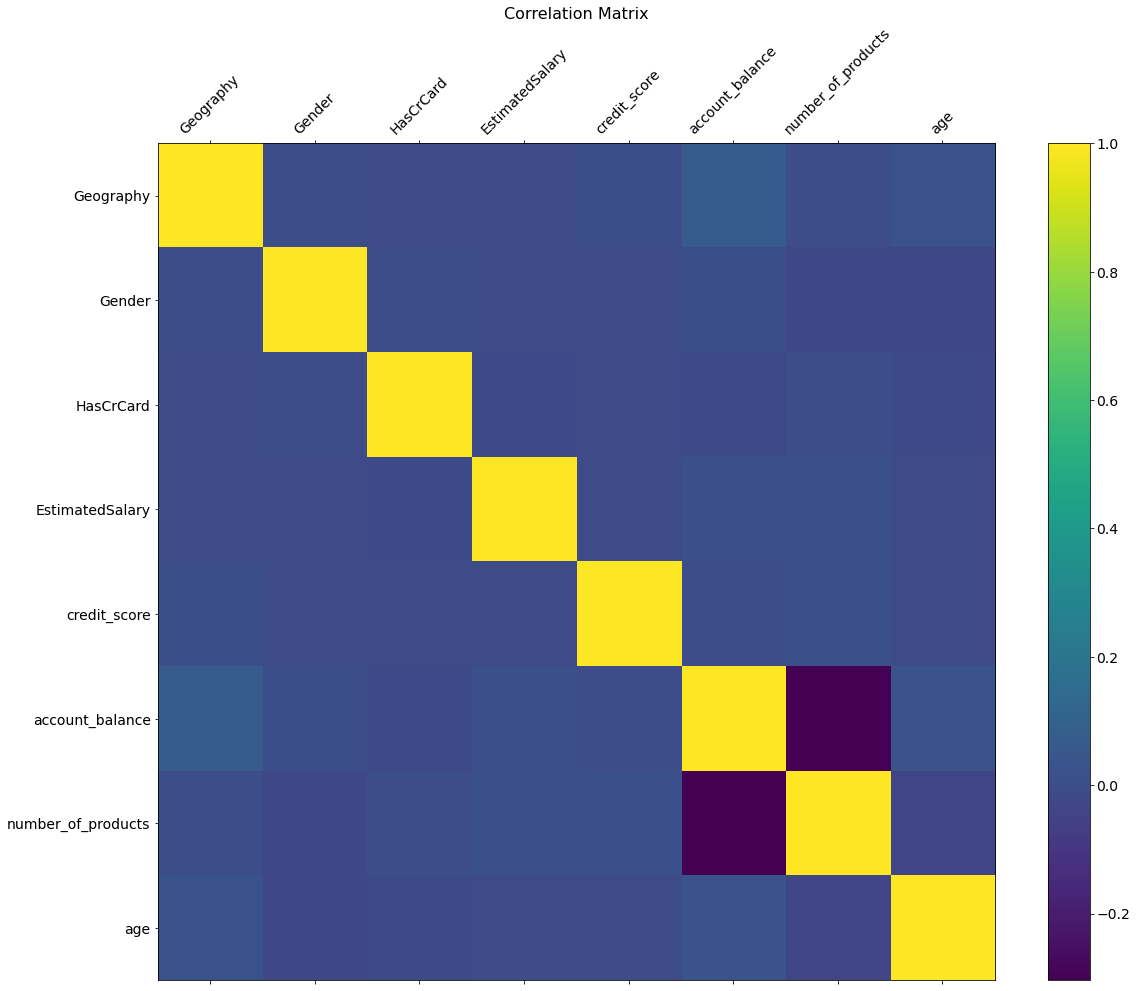

In [30]:
f = plt.figure(figsize=(19, 15))
plt.matshow(clients_final_table[features].corr(), fignum=f.number)
plt.xticks(range(clients_final_table[features].select_dtypes(['number']).shape[1]),
           clients_final_table[features].select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(clients_final_table[features].select_dtypes(['number']).shape[1]), 
           clients_final_table[features].select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In the first prediction attempts, it was noticed that data is umbalanced, therefore it produced biased results with high accuracy values, but low F1-Score, Precision, and the most important value in this study which is Recall (Prediction accuracy of clients who left KS before two years)

In [31]:
clients_final_table['left_early?'].value_counts()

0    8527
1    1470
Name: left_early?, dtype: int64

The approach used to fix the problem of unbalance data was one of undersampling. This approach was taken over an oversampling approach because in first place, there is enough data to undersample, but on the other hand, the difference between one class and the other is big and oversampling would produce a great amount of artificial data which might produce biased results

In [32]:
X_majority = clients_final_table.loc[clients_final_table['left_early?'] == 0] #Class with most records
X_minority = clients_final_table.loc[clients_final_table['left_early?'] == 1] #Class with the minority of records

The Cluster Centroid based Majority Under-sampling Technique (CCMUT) was used in this case. It complete description can be found at: https://towardsdatascience.com/implementation-of-cluster-centroid-based-majority-under-sampling-technique-ccmut-in-python-f006a96ed41c

In [33]:
def CCMUT(X,f):
    # 1. finding cluster centroid....
    cluster_centroid = np.sum(X,axis=0)/X.shape[0]
    # 2. finding Euclidean Distance from cluster centroid to samples
    euclidean = [None]*X.shape[0]
    for i in range(0,X.shape[0]):
        euclidean[i] = sqrt(sum((cluster_centroid-X[i])**2))
    # 3. tracking indices of samples in descending order of distance
    indices = list(reversed(sorted(range(len(euclidean)), 
    key = lambda j: euclidean[j])))
    # 4. removing the instances or under-sampling order-wise....
    X_f = np.delete(X, indices[:int(f/100*X.shape[0])], axis=0)
    # 5. returning the under-sampled Majority Sample Matrix
    return X_f

#CCMUT is applied in the majority class, and a reduction of about 80% is performed
X_majority = CCMUT(np.asarray(X_majority), 80)
X_majority = pd.DataFrame(X_majority,columns= features + ['left_early?'])

Data is not umbalanced anymore

In [34]:
clients_final_table = pd.concat([X_majority, X_minority], ignore_index=True)
clients_final_table['left_early?'].value_counts()

0.0    1706
1.0    1470
Name: left_early?, dtype: int64

The following cells divide the dataset and the labels, and Standardize features by removing the mean and scaling to unit variance

In [35]:
X = clients_final_table[features]
y = clients_final_table[['left_early?']]
X = np.asarray(X)
y = np.asarray(y)

In [36]:
#Scale Dataset
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Performance measures were tested through a cross-validation method which allow us to avoid biased results due to the selection of the train and test dataset

In [37]:
# prepare configuration for cross validation test harness
seed = 151461
folds = ShuffleSplit(n_splits=10, test_size=0.30, random_state=seed) #ShuffleSplit
# folds = StratifiedShuffleSplit(n_splits=10, test_size=0.30, random_state=seed) #StratifiedShuffleSplit

# Testing Machine Learning Classifiers

Ada Boost Classifier

In [38]:
clf =  AdaBoostClassifier()
accuraccy_Ada, f1_Ada, recall_Ada = cross_vald(clf, folds, X, y)

Accuracy: 0.861 (+/- 0.015)
F1-Score: 0.840 (+/- 0.019)
Precision: 0.905 (+/- 0.030)
Recall: 0.784 (+/- 0.038)


Gaussian Naive Bayes

In [39]:
clf =  GaussianNB()
accuraccy_NB, f1_NB, recall_NB = cross_vald(clf, folds, X, y)

Accuracy: 0.814 (+/- 0.019)
F1-Score: 0.781 (+/- 0.021)
Precision: 0.859 (+/- 0.041)
Recall: 0.717 (+/- 0.039)


Quadratic Discriminant Analysis

In [40]:
clf =  QuadraticDiscriminantAnalysis()
accuraccy_QDA, f1_QDA, recall_QDA = cross_vald(clf, folds, X, y)

Accuracy: 0.817 (+/- 0.017)
F1-Score: 0.785 (+/- 0.022)
Precision: 0.860 (+/- 0.039)
Recall: 0.724 (+/- 0.043)


Support Vector Machine

In [41]:
# clf = SVC()

# parameter_space = {
#     'C': [1, 10, 15, 20, 25, 30, 50, 55, 60, 80],
#     'kernel': ['poly', 'rbf', 'sigmoid'],
#     'degree': [3,5],
#     'gamma': ['scale', 'auto']
# }

# clf = find_best_param(clf, folds, X, y, parameter_space, scoring = 'recall')

In [42]:
# print_best_param(clf, 0.80, 0.03)

In [43]:
clf = SVC(C=10, kernel = 'rbf', degree = 3, gamma = 'scale')
accuraccy_SVC, f1_SVC, recall_SVC = cross_vald(clf, folds, X, y)

Accuracy: 0.866 (+/- 0.014)
F1-Score: 0.848 (+/- 0.015)
Precision: 0.897 (+/- 0.023)
Recall: 0.804 (+/- 0.030)


k-Nearest Neighborhoods

In [44]:
# clf = KNeighborsClassifier()

# parameter_space = {
#     'n_neighbors': [1, 3, 4, 5, 10, 15, 20],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2]
# }

# clf = find_best_param(clf, folds, X, y, parameter_space, scoring = 'recall')

In [45]:
# print_best_param(clf, 0.715, 0.04)

In [46]:
clf = KNeighborsClassifier(n_neighbors = 1, p=1, weights='uniform')
accuraccy_kNN, f1_kNN, recall_kNN = cross_vald(clf, folds, X, y)

Accuracy: 0.778 (+/- 0.024)
F1-Score: 0.750 (+/- 0.025)
Precision: 0.783 (+/- 0.036)
Recall: 0.720 (+/- 0.037)


Random Forest Classifier

In [47]:
# clf = RandomForestClassifier()

# parameter_space = {
#     'n_estimators': [50, 100, 200, 300, 350],
#     'max_depth': [None, 10, 100, 200],
#     'criterion': ['gini', 'entropy'],
#     'min_samples_split': [2, 5, 10, 20, 50],
#     'max_features': ['sqrt','log2'],
# }

# clf = find_best_param(clf, folds, X, y, parameter_space, scoring = 'recall')

In [48]:
# print_best_param(clf, 0.811, 0.035)

In [49]:
clf = RandomForestClassifier(criterion = 'gini', max_depth = None,
                             max_features = 'sqrt', min_samples_split = 5, 
                             n_estimators = 50)
accuraccy_RF, f1_RF, recall_RF = cross_vald(clf, folds, X, y)

Accuracy: 0.872 (+/- 0.013)
F1-Score: 0.856 (+/- 0.015)
Precision: 0.899 (+/- 0.027)
Recall: 0.807 (+/- 0.032)


Confusion matrix and classification score report for an instance of Random Forest

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=seed, test_size = 0.3)
clf.fit(X_train, np.ravel(y_train))

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88       510
         1.0       0.91      0.80      0.85       443

    accuracy                           0.87       953
   macro avg       0.88      0.87      0.87       953
weighted avg       0.87      0.87      0.87       953



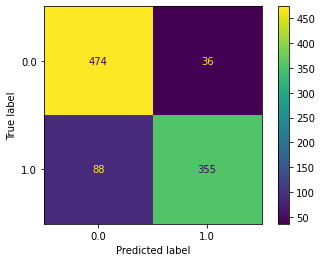

In [51]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show() 

Multilayer Perceptron

In [52]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [53]:
# clf = MLPClassifier()

# parameter_space = {
#     'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'lbfgs'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }

# clf = find_best_param(clf, folds, X, y, parameter_space, scoring = 'recall')

In [54]:
# print_best_param(clf, 0.8, 0.028)

In [55]:
clf = MLPClassifier(activation = 'relu', alpha = 0.0001, 
                    hidden_layer_sizes = (100,), 
                    learning_rate = 'adaptive', solver = 'lbfgs')
accuraccy_MLP, f1_MLP, recall_MLP = cross_vald(clf, folds, X, y)

Accuracy: 0.821 (+/- 0.015)
F1-Score: 0.816 (+/- 0.009)
Precision: 0.810 (+/- 0.031)
Recall: 0.826 (+/- 0.037)


Confusion matrix and classification score report for an instance of MLP

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=seed, test_size = 0.3)
clf.fit(X_train, np.ravel(y_train))

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       510
         1.0       0.81      0.81      0.81       443

    accuracy                           0.82       953
   macro avg       0.82      0.82      0.82       953
weighted avg       0.82      0.82      0.82       953



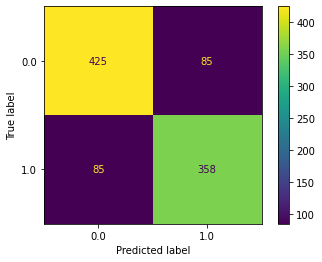

In [57]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show() 

# Performance Boxplots generation

In [58]:
acc = np.concatenate([np.reshape(accuraccy_Ada,(folds.get_n_splits(),1)),
                      np.reshape(accuraccy_NB,(folds.get_n_splits(),1)),
                      np.reshape(accuraccy_QDA,(folds.get_n_splits(),1)),
                      np.reshape(accuraccy_SVC,(folds.get_n_splits(),1)), 
                      np.reshape(accuraccy_kNN,(folds.get_n_splits(),1)), 
                      np.reshape(accuraccy_RF,(folds.get_n_splits(),1)), 
                      np.reshape(accuraccy_MLP,(folds.get_n_splits(),1))],axis=1)

f1 = np.concatenate([np.reshape(f1_Ada,(folds.get_n_splits(),1)),
                      np.reshape(f1_NB,(folds.get_n_splits(),1)),
                      np.reshape(f1_QDA,(folds.get_n_splits(),1)),
                      np.reshape(f1_SVC,(folds.get_n_splits(),1)), 
                      np.reshape(f1_kNN,(folds.get_n_splits(),1)), 
                      np.reshape(f1_RF,(folds.get_n_splits(),1)), 
                      np.reshape(f1_MLP,(folds.get_n_splits(),1))],axis=1)

recall = np.concatenate([np.reshape(recall_Ada,(folds.get_n_splits(),1)),
                      np.reshape(recall_NB,(folds.get_n_splits(),1)),
                      np.reshape(recall_QDA,(folds.get_n_splits(),1)),
                      np.reshape(recall_SVC,(folds.get_n_splits(),1)), 
                      np.reshape(recall_kNN,(folds.get_n_splits(),1)), 
                      np.reshape(recall_RF,(folds.get_n_splits(),1)), 
                      np.reshape(recall_MLP,(folds.get_n_splits(),1))],axis=1)

In [59]:
accdf = pd.DataFrame(acc,columns=['Ada','NB','QDA','SVC', 'KNN', 'RandFor', 'MLP'])
f1df = pd.DataFrame(f1,columns=['Ada','NB','QDA','SVC', 'KNN', 'RandFor', 'MLP'])
recalldf = pd.DataFrame(recall,columns=['Ada','NB','QDA','SVC', 'KNN', 'RandFor', 'MLP'])

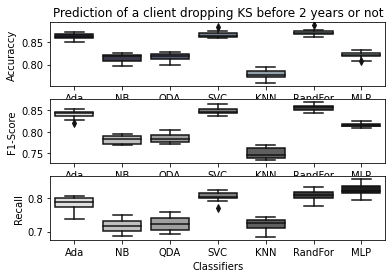

In [60]:
boxplots(accdf, f1df, recalldf)